In [ ]:
# Mount data from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import sys
sys.path.append("/content/drive/Shareddrives/Working Group - NLP in Engineering Education Research/Fall 2021 Independent Study/Sample code")

In [ ]:
!git clone https://github.com/crabcamp/lexrank.git

Cloning into 'lexrank'...
remote: Enumerating objects: 1232, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 1232 (delta 25), reused 41 (delta 15), pack-reused 1172
Receiving objects: 100% (1232/1232), 791.42 KiB | 11.64 MiB/s, done.
Resolving deltas: 100% (430/430), done.


In [ ]:
# needed for lexrank
!pip install urlextract

In [ ]:
import sys
sys.path.append('/content/lexrank/')

from lexrank.lexrank import degree_centrality_scores

In [ ]:
!pip install umap-learn
!pip install hdbscan
!pip install -U sentence-transformers

     |████████████████████████████████| 80 kB 5.4 MB/s 
     |████████████████████████████████| 1.1 MB 24.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=65af93b6056dcb26250b372a1fb47516ce6e1c649e0be3e2801a4c3a6c74ef2d
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=c32f9aa52108014405acc8886adf329fe57780b0fd0af0e1206942174e74f292
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent
     |████████████████████████████████| 6.4 MB 7.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311870 sha256=7f0f606c06e47e66f65ef3215cdd

In [ ]:
import embed_cluster as ec

sklearn modules imported


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


transformer module imported


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:664: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import umap
#import umap.plot
import hdbscan
import spacy
from spacy.lang.en import English

from sklearn.manifold import MDS, TSNE


import pickle


In [ ]:
data_dir = "/content/drive/Shareddrives/Project - ENGE and NLP/data"
os.chdir(data_dir)
os.listdir()

['since_2016_ehr_no_dupes.csv',
 'scopus_ijee_filtered_mod_20201029.csv',
 'jee_article_df_cleaned_20210608.csv',
 'jee_article_df_cleaned_20210608.zip',
 'scopus_ijee_filtered_mod_20201029.zip',
 '.Rhistory',
 '.RData',
 'jee-article-df-cleaned-20210608.db',
 'english-ewt-ud-2.5-191206.udpipe',
 'sample docs',
 'Sample Interviews']

In [ ]:
jee_df = pd.read_csv("jee_article_df_cleaned_20210608.csv")

In [ ]:
jee_df.columns

Index(['title', 'year', 'first_pg', 'last_pg', 'authors', 'schools',
       'article_type', 'volume', 'issue', 'abstract', 'keywords', 'url',
       'article_url_list_index'],
      dtype='object')

In [ ]:

# =============================================================================
# Utility functions
# =============================================================================



def select_and_filter(original_df, text_column):
    """
    Parameters
    ----------
    item : str
        Name of the column to filter based on.
    original_df : dataframe
        Original input dataframe with text columns.

    Returns
    -------
    filtered_df : dataframe
        Dataframe that has removed the NAs in the {item} column.
    item_list : list
        List of the text in the {item} column. This list is passed to the transformer model.
    """
    original_df['added_id'] = original_df.index + 1
    filtered_df = original_df.loc[pd.notnull(original_df[text_column])]
    print(f"Filtered dataframe for {text_column}.")
    print(f"Dataframe has size {filtered_df.shape}.")
    
    item_list = filtered_df[text_column].to_list()
    print(f"The list has length {len(item_list)}.")
        
    return filtered_df, item_list

jee_df.columns

jee_filtered_df, jee_filtered_list = select_and_filter(jee_df, 'abstract')
# 1089 x 14





Filtered dataframe for abstract.
Dataframe has size (1426, 14).
The list has length 1426.


In [ ]:

def sentence_segmenter(data_frame, text_column):
    # first, create list from series of text
    
    entry_list = data_frame[text_column].to_list()
    
    # try using dictionary of lists
    
    new_df_dict = {'text_column': [],
                   'original_id': [],
                   'original_entry': [],
                   'split_sent': [],
                   'sent_num': []}
    
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    
    ## using the process of converting series to list and then iterating over list
    for i, entry in enumerate(entry_list):
        doc = nlp(entry)
        sentences = [sent.string.strip() for sent in doc.sents]
        for j, sent in enumerate(sentences):
            new_df_dict['text_column'].append(text_column)
            new_df_dict['original_id'].append(i)
            new_df_dict['original_entry'].append(entry)
            new_df_dict['split_sent'].append(sent)
            new_df_dict['sent_num'].append(j)
            
    sentence_df = pd.DataFrame(new_df_dict)
    
    item_list = sentence_df['split_sent'].to_list()
    
    print(f"Filtered dataframe for {text_column}.")
    print(f"Dataframe has size {sentence_df.shape}.")
    print(f"The list has length {len(item_list)}.")

    
    return sentence_df, item_list
    

In [ ]:
# this is the code to add download the en_core_web_lg language model for spacy
!python -m spacy download en_core_web_lg
#https://stackoverflow.com/questions/56927602/unable-to-load-the-spacy-model-en-core-web-lg-on-google-colab

# note: need to restart runtime after downloading

In [ ]:
nlp = spacy.load("en_core_web_lg")

jee_sentence_df, jee_sent_list = sentence_segmenter(jee_filtered_df, 'title')


Filtered dataframe for title.
Dataframe has size (1459, 5).
The list has length 1459.


In [ ]:
# Next, use the sentence list for embedding

sent_embedding = ec.embed_raw_text(jee_sent_list, 'mpnet', max_seq_length=200)
    

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Original model max_seq_length: 512.
New model max_seq_length: 200.
Raw text embedding completed.
Original raw text had dimension: 1459.
The dimension of the embedding is (1459, 768).


In [ ]:
# pickle the embeddings since there are 118175 sentences in the full 53k observation dataset
#pickle_out = open('catme_filtered_sentence_mpnet_20210829.pickle', 'wb')
pickle_out = open('jee_sentence_mpnet_20211028.pickle', 'wb')
pickle.dump(sent_embedding, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open('jee_sentence_mpnet_20211028.pickle', 'rb')
sent_embedding = pickle.load(pickle_in)
pickle_in.close()

In [ ]:

embed_param_dict = embed_param_dict= {'pca_dim': 85,
                   'n_neighbors': 4,
                   'min_dist': 0.0,
                   'n_components': 5,
                   'metric': 'cosine',
                   'random_state': 123}

embed_param_title = "pca_dim:" + str(embed_param_dict['pca_dim']) + ', n_nei:' + str(embed_param_dict['n_neighbors'])

lower_embed = ec.project_original_embedding(sent_embedding, 
                                            embed_param_dict, 
                                            to_low = False, 
                                            mid_to_low_method='umap',
                                            title=embed_param_title)
   

You have selected agglomerative for clustering.
Clustering completed.


<Figure size 432x288 with 0 Axes>

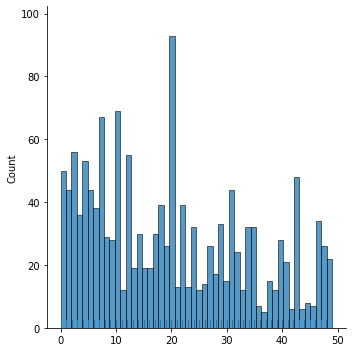

[43 10 10 ... 29 27  9]
The minimum cluster number is: 0.
The length of cluster_model.labels_ is 1459.
The length of the original corpus list is 1459.
Cluster  0
Cluster size: 50
['Effectiveness of a Multimedia Televised Distance Education Program for Engineering Majors', 'Effective Transfer of Computer Graphics to Video Format', "Why Isn't My Professor Using Graphics in the Freshman Programming Course?", 'A Model for On-Line Learning Networks in Engineering Education', 'Interactive Multimedia Courseware and the Hands-on Learning Experience: An Assessment Study', 'Computer-Assisted Distance Learning, Part II: Examination Performance of Students On and Off Campus', 'A Comparative Evaluation of World Wide Web-Based and Classroom Teaching', 'Perspectives on the Role of Educational Technologies', 'The Multimedia Finite Element Modeling and Analysis Tutor', 'Development of a CD-ROM in Thin Film Technologies: Design, Usability Assessment, and Challenges', 'Innovations in Large-Scale Supporte

In [ ]:
cluster_param_dict = {'min_cluster_size': 5, # hdbscan options
                      'min_samples': 1,
                      'cluster_selection_epsilon': 0.1,
                      'alpha': 1.0,
                      'metric': 'euclidean',
                      'agg_type': "n_cluster", # agglomerative options - can be threshold or n_cluster
                      'n_clusters': 50,
                      'threshold_val': 1.5,
                      'affinity': 'euclidean',
                      'linkage': 'ward',
                      'num_clusters': 30}

# version to use the lower-dimensional embedding for the clustering     
cluster_res = ec.cluster_embedding(data=lower_embed, original_corpus_list=jee_sent_list, 
                  model='agglomerative', param_dict=cluster_param_dict, plot_option=True)



In [ ]:

all_cluster_labels = cluster_res.labels_

jee_sentence_df['cluster_label'] = all_cluster_labels


In [ ]:
jee_sentence_df

,text_column,original_id,original_entry,split_sent,sent_num,cluster_label
0,title,0,The Editor's Page,The Editor's Page,0,43
1,title,1,Drexel's E4 Program: A Different Professional ...,Drexel's E4 Program: A Different Professional ...,0,10
2,title,2,Attributes of Engineering Graduates and Their ...,Attributes of Engineering Graduates and Their ...,0,10
3,title,3,A Survey of Engineering Education Outside the ...,A Survey of Engineering Education Outside the ...,0,20
4,title,4,Student/Professor Ethics In Engineering Academia,Student/Professor Ethics In Engineering Academia,0,29
...,...,...,...,...,...,...
1454,title,1421,Dissolving the margins: LEANING INto an antira...,Dissolving the margins: LEANING INto an antira...,0,14
1455,title,1422,Positionality practices and dimensions of impa...,Positionality practices and dimensions of impa...,0,16
1456,title,1423,Exploring the discursive construction of ethic...,Exploring the discursive construction of ethic...,0,29
1457,title,1424,Resilient engineering identity development cri...,Resilient engineering identity development cri...,0,27


In [ ]:
import nltk
from sentence_transformers import SentenceTransformer, util
import numpy as np
from lexrank import LexRank
from lexrank.lexrank import degree_centrality_scores
import math

In [ ]:
np.sort(jee_sentence_df.cluster_label.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
# trying different model for embedding: all-MiniLM-L12-v2 to see if there's a difference compared to mpnet


jee_summary_dict = {'cluster': [],
                      'sum_sent': []}


bad_clusters = []




for i in range(jee_sentence_df['cluster_label'].nunique()):
    print(f"\nWorking on cluster {i}.")
    
    
    temp_cl_df = jee_sentence_df[jee_sentence_df['cluster_label'] == i]
    
    # decided not to use previously calculated embeddings because they would need to be converted to tensor
    # test_embed = test_df.loc[:,'0':'74']
    
    
    sentences = temp_cl_df['split_sent'].to_list()
    
    model = SentenceTransformer('all-MiniLM-L12-v2')
    embeddings = model.encode(sentences, convert_to_tensor=True)
    # embeddings = test_embed
    
    print(f"Finished embedding for cluster {i}.")
    
    
    #Compute the pair-wise cosine similarities
    cos_scores = util.pytorch_cos_sim(embeddings, embeddings).numpy()
    
    print(f"Calculated cosine similarities for cluster {i}.")
    #Compute the centrality for each sentence
    centrality_scores = degree_centrality_scores(cos_scores, threshold=None)
    
    print(f"Completed centrality scores for cluster {i}.")
    #We argsort so that the first element is the sentence with the highest score
    most_central_sentence_indices = np.argsort(-centrality_scores)
    cl_sent_num = len(sentences)
    sum_sent_cap = int(math.ceil(cl_sent_num * 0.2))
    
    #Print the top 20% of sentences with the highest scores
    print(f"Summary for cluster {i}: ")
    for idx in most_central_sentence_indices[0:sum_sent_cap]:
        print(sentences[idx].strip())
        
        jee_summary_dict['cluster'].append(i)
        jee_summary_dict['sum_sent'].append(sentences[idx].strip())
    
    



Working on cluster 0.


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Finished embedding for cluster 0.
Calculated cosine similarities for cluster 0.
Completed centrality scores for cluster 0.
Summary for cluster 0: 
Interactive Multimedia Courseware and the Hands-on Learning Experience: An Assessment Study
Study of Usage Patterns and Learning Gains in a Web-based Interactive Static Course
Engineering Online: Assessing Innovative Education
Online Engineering Education: Learning Anywhere, Anytime
Computer-Assisted Distance Learning, Part II: Examination Performance of Students On and Off Campus
e-Lab: An Electronic Classroom for Real-Time Distance Delivery of a Laboratory Course
Student Perceptions of Internet-Based Learning Tools in Environmental Engineering Education
Using Technology to Deliver Distance Education in Computer Science*
Fostering Collaborative Education through Internet Technologies
A Technology-Enhanced Learning Environment for an Optical Fiber Communications Course*

Working on cluster 1.
Finished embedding for cluster 1.
Calculated cosi

In [ ]:
bad_clusters

[]